In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
from model import Model_1, Model_2, Model_3, Model_4, Model_5
from datetime import datetime
from utils import get_device, transform_data_to_numpy, printSampleImages
from torchsummary import summary
import os
from tqdm import tqdm
from torch.utils.data import Subset
import time
import matplotlib.pyplot as plt

In [2]:
dataset = datasets.MNIST('./data', train=True, download=True, transform=transforms.ToTensor())
data_numpy = transform_data_to_numpy(dataset, dataset.data)
mean = torch.mean(data_numpy)
std = torch.std(data_numpy)


[Train]
 - Numpy Shape: (28, 60000, 28)
 - Tensor Shape: torch.Size([28, 60000, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


In [5]:
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transforms.ToTensor())
test_data_numpy = transform_data_to_numpy(test_dataset, test_dataset.data)
mean_test = torch.mean(test_data_numpy)
std_test = torch.std(test_data_numpy)

[Train]
 - Numpy Shape: (28, 10000, 28)
 - Tensor Shape: torch.Size([28, 10000, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1325)
 - std: tensor(0.3105)
 - var: tensor(0.0964)


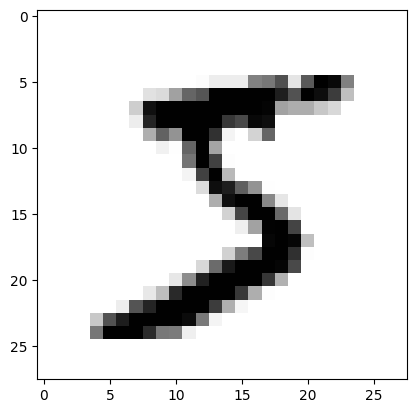

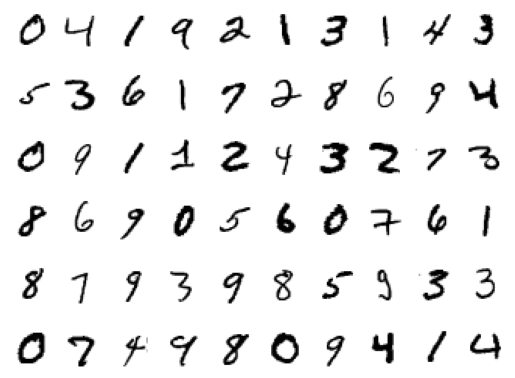

In [3]:
from utils import get_device, transform_data_to_numpy, printSampleImages

# Examing Data
printSampleImages(dataset)

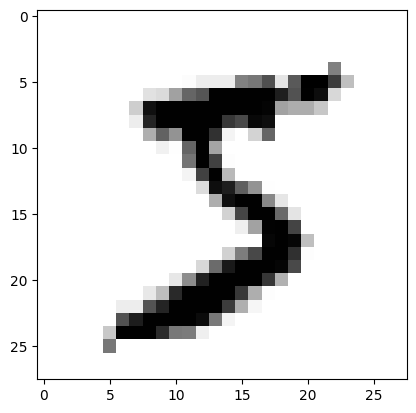

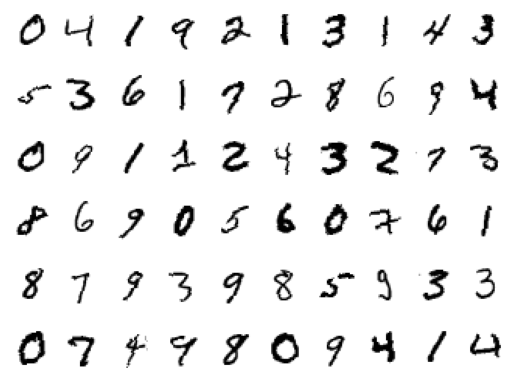

In [4]:
train_transform = transforms.Compose([
        transforms.RandomRotation((-10.0, 10.0), fill=(0,)),
        transforms.ToTensor(),
        transforms.Normalize((mean,), (std,))
    ])

# Examine data after augmentation
dataset = datasets.MNIST('./data', train=True, download=True, transform=train_transform)
printSampleImages(dataset)